In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import seaborn as sns

In [2]:
stu_ck1 = pd.read_excel('Study3.xlsx',sheet_name=0, header=0).dropna(axis = 0, how ='any')
s1 = stu_ck1['S1-Structure'].dropna()
d1 = stu_ck1['S1-Delivery'].dropna()
v1 = stu_ck1['S1-VisualAids'].dropna()

In [3]:
stu_ck2 = pd.read_excel('Study3.xlsx',sheet_name=1, header=0).dropna(axis = 0, how ='any')
s2 = stu_ck2['S2-Structure'].dropna()
d2 = stu_ck2['S2-Delivery'].dropna()
v2 = stu_ck2['S2-VisualAids'].dropna()

In [4]:
# Remove punctuation
from nltk.tokenize import RegexpTokenizer

def filter_video(comments):
    tknzr = TweetTokenizer()
    wordnet_lemmatizer = WordNetLemmatizer()
    
    token_words =[]
    for i in comments:
        token_words.append(tknzr.tokenize(i))
    

    # Combine all the comments
    all_words =[]
    for j in token_words:
        for k in j:
            all_words.append(k)
    # print(all_words)

    clean_words = []
    # tokenizer = RegexpTokenizer(r'\w+')
    for word in all_words:
        word = word.lower()
    #     removed_list.append(tokenizer.tokenize(i))
        word = re.sub("[\(\)\=\s+\d+\.\?\''\:\-\!\|\/_,$%^*(+\"]+","",word)
        clean_words.append(word)
    clean_words = list(filter(None, clean_words))

    # Remove stop words  
    filtered_sentence = []
    stop_words = set(stopwords.words('english')) 

    for w in clean_words: 
        if w not in stop_words: 
#             w = wordnet_lemmatizer.lemmatize(w)
            filtered_sentence.append(w) 
    return filtered_sentence

In [21]:
def draw(info):

    result = filter_video(info)

    # # Calculate frequency~
    frequency_words = FreqDist(result)
    frequency_words.plot(30,scalex=False,cumulative=False, color='purple',title='Most 30 common words in S2-VisualAids',linewidth=4)
    plt.show()

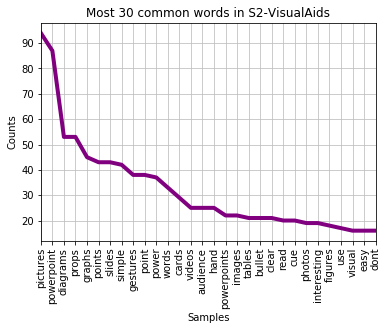

In [22]:
draw(v2)

## S1 all

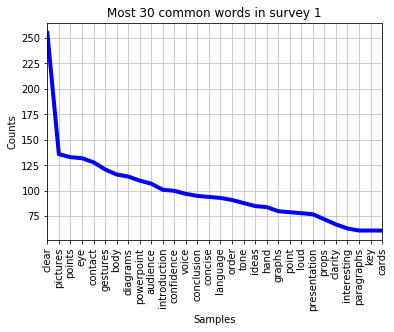

In [12]:
s1_clean = filter_video(s1)
d1_clean = filter_video(d1)
v1_clean = filter_video(v1)

s1_all = s1_clean + d1_clean + v1_clean

draw(s1_all)

## S2 all

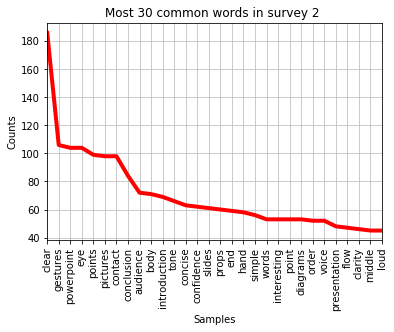

In [14]:
s2_clean = filter_video(s2)
d2_clean = filter_video(d2)
v2_clean = filter_video(v2)

s2_all = s2_clean + d2_clean + v2_clean

draw(s2_all)